In [1]:
%reload_ext autoreload
%autoreload 2
import os, sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="4"  # specify which GPU(s) to be used
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sys.path.append("../Step2_Curriculum_Subset/")

from curriculum_clustering import CurriculumClustering

In [2]:
fold = 1
mode = "curriculum_easy_60idx"
saved_feature = np.load(f"./image_features_{mode}_{fold}.npy")
image_feature = saved_feature[:,2:]

In [3]:
df = pd.read_csv(f"./Train_Data_{mode}_{fold}.csv")
category = df["k_means_grp"].to_numpy()
# category = [0] * len(df)

In [4]:
curriculumCluster = CurriculumClustering(verbose = True, dim_reduce = 400, calc_auxiliary = True)
cu_clusters = curriculumCluster.fit(image_feature, category)

Clustering 1 of 12 categories into 3 curriculum subsets (1.58 secs).
Clustering 2 of 12 categories into 3 curriculum subsets (1.29 secs).
Clustering 3 of 12 categories into 3 curriculum subsets (1.24 secs).
Clustering 4 of 12 categories into 3 curriculum subsets (1.09 secs).
Clustering 5 of 12 categories into 3 curriculum subsets (1.96 secs).
Clustering 6 of 12 categories into 3 curriculum subsets (1.48 secs).
Clustering 7 of 12 categories into 3 curriculum subsets (1.73 secs).
Clustering 8 of 12 categories into 3 curriculum subsets (1.25 secs).
Clustering 9 of 12 categories into 3 curriculum subsets (1.51 secs).
Clustering 10 of 12 categories into 3 curriculum subsets (2.26 secs).
Clustering 11 of 12 categories into 3 curriculum subsets (1.28 secs).
Clustering 12 of 12 categories into 3 curriculum subsets (1.60 secs).


In [5]:
cu_clusters.output_labels, cu_clusters.auxiliary_info

(array([1, 0, 0, ..., 0, 0, 0]),
 [(178, 19.861687, 597.0),
  (321, 12.537177, 801.0),
  (150, 10.54949, 714.0),
  (354, 21.892385, 597.0),
  (250, 15.953521, 694.0),
  (502, 11.389055, 912.0),
  (579, 8.500664, 604.0),
  (28, 10.380925, 702.0),
  (62, 10.608259, 1009.0),
  (491, 11.219382, 760.0),
  (409, 11.290733, 687.0),
  (197, 9.178627, 895.0)])

In [6]:
df["curicullum_cluster_grp"] = cu_clusters.output_labels
df.to_csv(f"./Train_Data_{mode}_{fold}.csv", index = False)
df.head()

,image_id,data_provider,isup_grade,gleason_score,tile_number,split,tile_pixel,tile_blueratio,image_idx,k_means_grp,curicullum_cluster_grp
0,9716b5d2e13a28be3dc836134153720c,radboud,4,4+4,7,1.0,"121,109,111,86,81,79,77,","48,40,46,33,32,33,28,",0,10,1
1,0954f0bb123cf3be8b00c9c989dcf3d6,karolinska,0,0+0,43,1.0,"152,141,135,134,127,128,128,123,126,122,117,11...","47,41,43,40,45,44,39,43,45,43,48,42,40,33,41,3...",1,2,0
2,d861180850ca54282b38c782734a7dc7,karolinska,0,0+0,39,0.0,"89,82,72,67,70,69,69,60,61,69,68,69,58,57,60,6...","32,30,29,29,25,27,26,26,26,25,25,25,26,25,26,2...",2,6,0
3,459154b1334d073cfef8af95362a7051,karolinska,0,0+0,34,1.0,"112,103,102,99,92,89,97,90,94,88,83,83,82,79,7...","42,34,40,33,37,31,38,31,33,33,29,30,33,31,30,2...",3,6,0
4,27489a7f1972687cccb1258116ff7f10,karolinska,0,0+0,24,0.0,"105,101,101,92,87,85,84,89,86,83,81,77,73,80,7...","34,35,37,35,32,31,32,29,31,29,31,28,28,29,27,2...",4,3,0


### Visualization

In [7]:
tsne_result = np.load(f"./tsne_results_3cmp_{mode}_{fold}.npy")
df_tmp = df.copy()
df_tmp["tsne_1"] = tsne_result[:,0]
df_tmp["tsne_2"] = tsne_result[:,1]

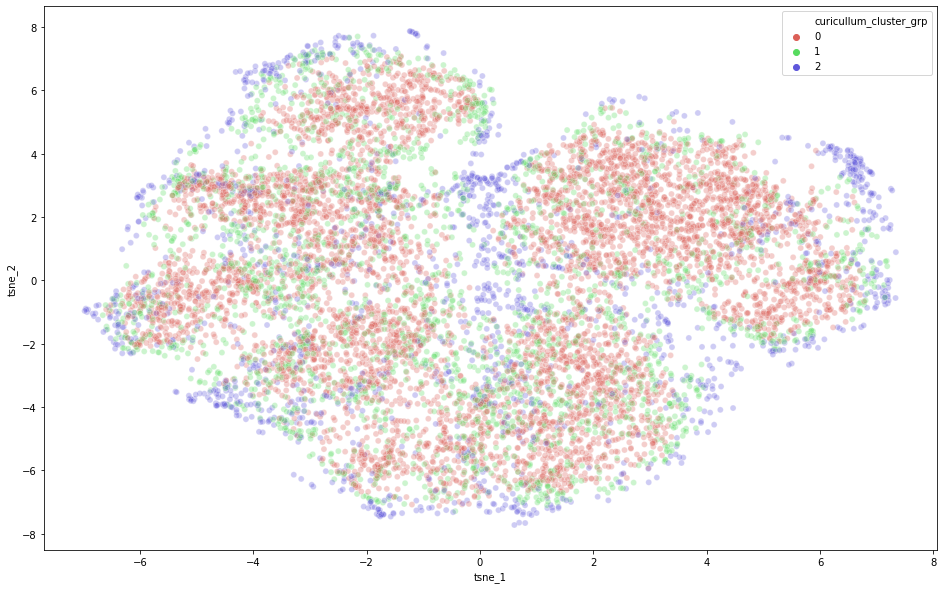

In [8]:
# k_means_grp = 4
# df_k = df_tmp.loc[df["k_means_grp"] == k_means_grp]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="curicullum_cluster_grp",
    palette=sns.color_palette("hls", 3),
    data=df_tmp,
    legend="full",
    alpha=0.3
)

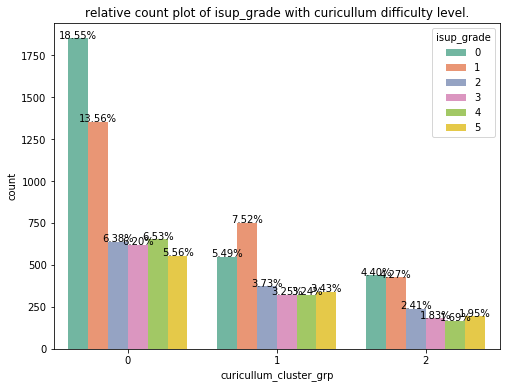

In [9]:
def plot_relative_distribution(df, feature, hue, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(x=feature, hue=hue, data=df, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

plot_relative_distribution(df=df_tmp, feature='curicullum_cluster_grp', hue='isup_grade', 
                                   title = f'relative count plot of isup_grade with curicullum difficulty level.', 
                                   size=2)